# ***Plot benign photos from the benign vs malignant datasets***

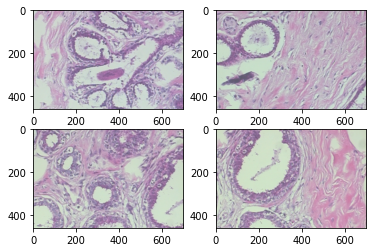

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/Colab Notebooks/Dataset/train/benign/'
# plot first few images
for i in range(4):
	# define subplot
	pyplot.subplot(220 + 1 + i)
	# define filename
	filename = folder + 'SOB_B_A-14-22549AB-100-01' + str(i) + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# ***Plot malignant photos from the benign vs malignant datasets***

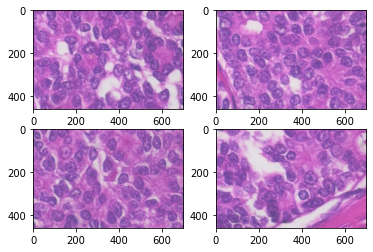

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/Colab Notebooks/Dataset/train/malignant/'
# plot first few images
for i in range(4):
	# define subplot
	pyplot.subplot(220 + 1 + i)
	# define filename
	filename = folder + 'SOB_M_DC-14-5694-400-00' + str(i) + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# ***Path***

In [ ]:
# r'/content/drive/My Drive/Dataset'
PATH = r'/content/drive/My Drive/Colab Notebooks/Dataset'

In [ ]:
import os
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [ ]:
train_benign_dir = os.path.join(train_dir, 'benign')  # directory with our training cat pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')  # directory with our training dog pictures
test_benign_dir = os.path.join(test_dir, 'benign')  # directory with our validation cat pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')  # directory with our validation dog pictures

***Total traning imgges and testing imgages***

In [ ]:
num_benign_train = len(os.listdir(train_benign_dir))
num_malignant_train = len(os.listdir(train_malignant_dir))

num_benign_test = len(os.listdir(test_benign_dir))
num_malignant_test = len(os.listdir(test_malignant_dir))

total_train = num_benign_train + num_malignant_train
total_val = num_benign_test + num_malignant_test

In [ ]:
print('total training benign images:', num_benign_train)
print('total training malignant images:', num_malignant_train)
print('total testing benign images:', num_benign_test)
print('total testing malignant images:', num_malignant_test)
print("--")
print("Total training images:", total_train)
print("Total testing images:", total_val)

total training benign images: 440
total training malignant images: 440
total testing benign images: 110
total testing malignant images: 110
--
Total training images: 880
Total testing images: 220


# ***Convolutional Neural Network Model***

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)            

***Data Generator and Preprocessing*** 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   zoom_range = 0.2,horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)
# prepare iterators
train_it = train_datagen.flow_from_directory(train_dir,
		class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory(test_dir,
		class_mode='binary', batch_size=64, target_size=(200, 200))

Found 880 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [ ]:
from keras.optimizers import SGD
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20 )
# evaluate model
_, acc = model.evaluate_generator(train_it, steps=len(train_it))
print('train: > %.3f' % (acc * 100.0))
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it))
print('test: > %.3f' % (acc * 100.0))

Epoch 1/20
14/14 [==============================] - 95s 7s/step - loss: 1.2176 - accuracy: 0.5091 - val_loss: 0.6694 - val_accuracy: 0.5000
Epoch 2/20
14/14 [==============================] - 90s 6s/step - loss: 0.5676 - accuracy: 0.8205 - val_loss: 0.3160 - val_accuracy: 0.8864
Epoch 3/20
14/14 [==============================] - 90s 6s/step - loss: 0.4255 - accuracy: 0.8614 - val_loss: 0.3717 - val_accuracy: 0.9182
Epoch 4/20
14/14 [==============================] - 92s 7s/step - loss: 0.4134 - accuracy: 0.8420 - val_loss: 0.2013 - val_accuracy: 0.8864
Epoch 5/20
14/14 [==============================] - 89s 6s/step - loss: 0.3419 - accuracy: 0.8818 - val_loss: 0.1286 - val_accuracy: 0.9136
Epoch 6/20
14/14 [==============================] - 89s 6s/step - loss: 0.3614 - accuracy: 0.8830 - val_loss: 0.3239 - val_accuracy: 0.8909
Epoch 7/20
14/14 [==============================] - 89s 6s/step - loss: 0.3213 - accuracy: 0.8909 - val_loss: 0.2266 - val_accuracy: 0.9091
Epoch 8/20
14/14 [==

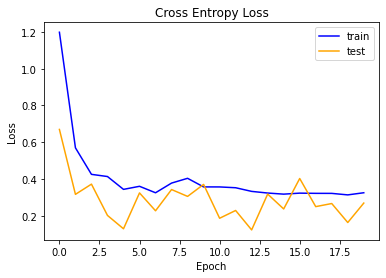

In [ ]:
import sys
# plot loss
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
pyplot.ylabel("Loss")
pyplot.xlabel("Epoch")
# save plot to file
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '-loss_plot.png')


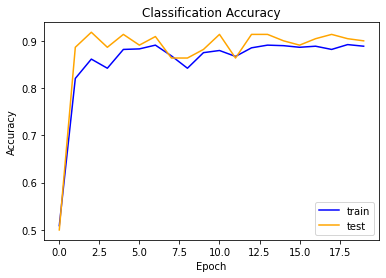

In [ ]:
import sys
# plot accuracy
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epoch")
# save plot to file
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '-accuracy_plot.png')


In [ ]:
# save model
model.save('final_model.h5')

In [ ]:
from keras.models import load_model 
model = load_model('final_model.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image
folder = '/content/drive/My Drive/Colab Notebooks/Dataset/untrained/benign/'
# plot first few images
for i in range(9):
  filename = folder + 'SOB_B_00' + str(i) + '.png'
  test_image =image.load_img(filename,target_size =(200,200))
  test_image =image.img_to_array(test_image)
  test_image =np.expand_dims(test_image, axis =0)
  result = model.predict(test_image)
  if result[0][0] >= 0.5:
    prediction = 'malignant'
  else:
    prediction = 'benign'
  print(result)
  print(prediction)


[[0.]]
benign
[[0.]]
benign
[[0.]]
benign
[[0.]]
benign
[[0.]]
benign
[[0.]]
benign
[[0.]]
benign
[[0.]]
benign
[[0.]]
benign


In [ ]:
import numpy as np
from keras.preprocessing import image
folder = '/content/drive/My Drive/Colab Notebooks/Dataset/untrained/malignant/'
# plot first few images
for i in range(4):
  filename = folder + 'SOB_M_01' + str(i) + '.png'
  test_image =image.load_img(filename,target_size =(200,200))
  test_image =image.img_to_array(test_image)
  test_image =np.expand_dims(test_image, axis =0)
  result = model.predict(test_image)
  if result[0][0] >= 0.5:
    prediction = 'malignant'
  else:
    prediction = 'benign'
  print(result)
  print(prediction)


[[1.]]
malignant
[[1.]]
malignant
[[1.]]
malignant
[[1.]]
malignant
